In [8]:
# to run in google colab
import sys

if "google.colab" in sys.modules:
    import subprocess

    subprocess.call("apt-get install subversion".split())
    subprocess.call(
        "svn export https://github.com/YoniChechik/AI_is_Math/trunk/c_03_edge_detection/ex3/butterfly_noisy.jpg".split()
    )



In [9]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

figsize = (10, 10)



In [10]:
def unnormalized_gaussian(x, sigma):
    # TODO: [V] helper function for calculating exponent of (-x) divided by two sigma (one line)
    y = x/sigma
    return np.exp(-y**2/2)


def distance(x, y, i, j):
    # TODO: [V] get L2 distance function between two points - helper function for calculating "g_s" (one line)
    delta_x = x-i 
    delta_y = y-j
    return np.sqrt(delta_x**2+delta_y**2)




In [11]:
def bilateral_one_pixel(source, x, y, d, sigma_r, sigma_s):
    # === init vars
    filtered_pix = 0
    Wp = 0
    px_intensity = source[x][y]

    # TODO: 
    # 1. run on all neighboors (~3 lines)
    # 2. if neighboor out of matrix indices - don't count him in your computation (~2 lines)
    # 3. find filtered_pix (~6 lines)
    for row in range(x-d//2,x+1+d//2):
        for col in range(y-d//2 , y+1+d//2):
            if row < 0 or row >= source.shape[0] or col < 0 or col >= source.shape[1]:
                continue 
            curr_intensity = source[row][col] 
            gs = unnormalized_gaussian(distance(row, col , x, y),sigma_s)            
            fr = unnormalized_gaussian(abs(curr_intensity - px_intensity), sigma_r)
            filtered_pix += curr_intensity*gs*fr
            Wp += gs*fr

    # make result uint8
    filtered_pix /= Wp 
    filtered_pix = np.clip(filtered_pix, 0, 255).astype(np.uint8)
    return filtered_pix




In [12]:
def bilateral_filter(source, d, sigma_r, sigma_s):

    # build empty filtered_image
    filtered_image = np.zeros(source.shape, np.uint8)
    # make input float
    source = source.astype(float)
    # d must be odd!
    assert d % 2 == 1, "d input must be odd"

    # TODO: run on all pixels with bilateral_one_pixel(...) (~4 lines)
    for x in range(source.shape[0]):
        for y in range(source.shape[1]):
            px = source[x][y]
            filtered_image[x][y] = bilateral_one_pixel(source,x,y,d,sigma_r,sigma_s)

    return filtered_image




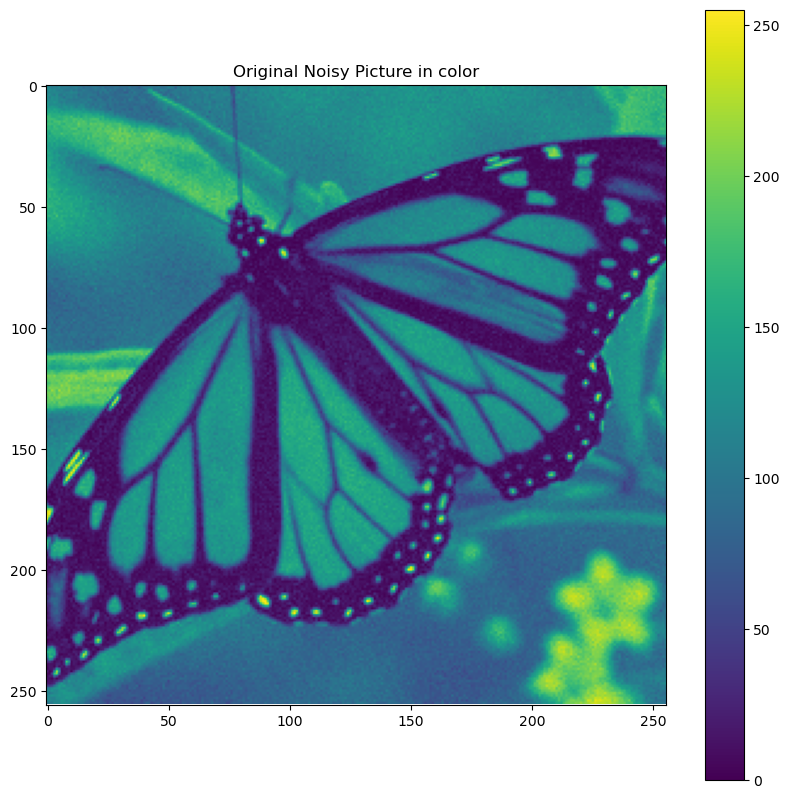

In [20]:
# upload noisy image
src = cv2.imread("butterfly_noisy.jpg")
src = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10, 10))
#plt.imshow(src, cmap="gray", vmin=0, vmax=255)
plt.imshow(src)
plt.title("Original Noisy Picture in color")
plt.colorbar()
plt.show()



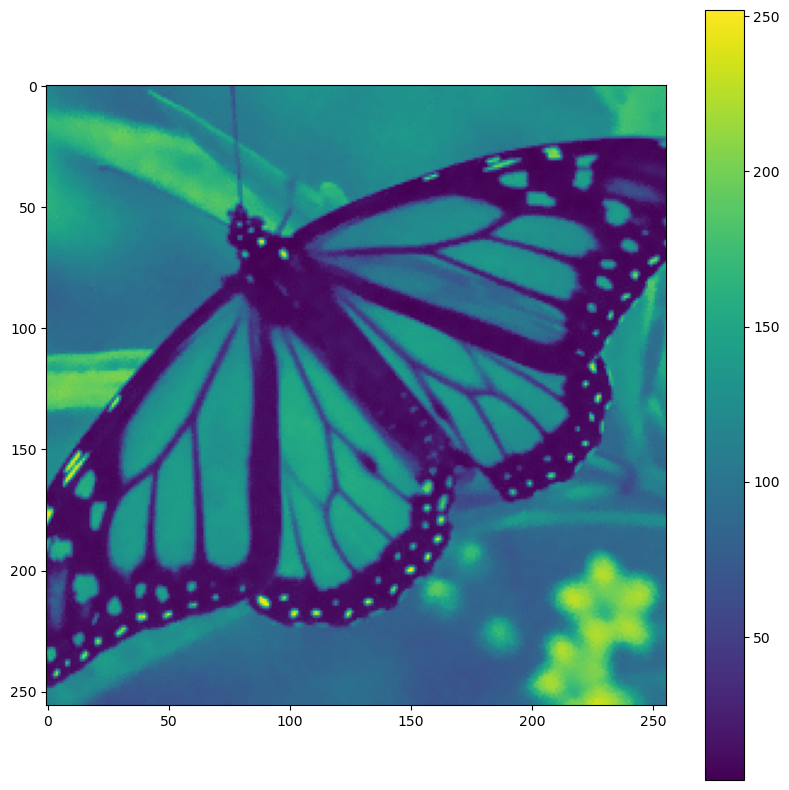

In [21]:
# run bilateral_filter(...)
d = 5  # edge size of neighborhood perimeter
sigma_r = 12  # sigma range
sigma_s = 16  # sigma spatial



filtered_image = bilateral_filter(src, d, sigma_r, sigma_s)


plt.figure(figsize=(10, 10))
plt.imshow(filtered_image)
plt.title("My filter sigma_s=16 sigma_r=12")
plt.colorbar()
plt.show()



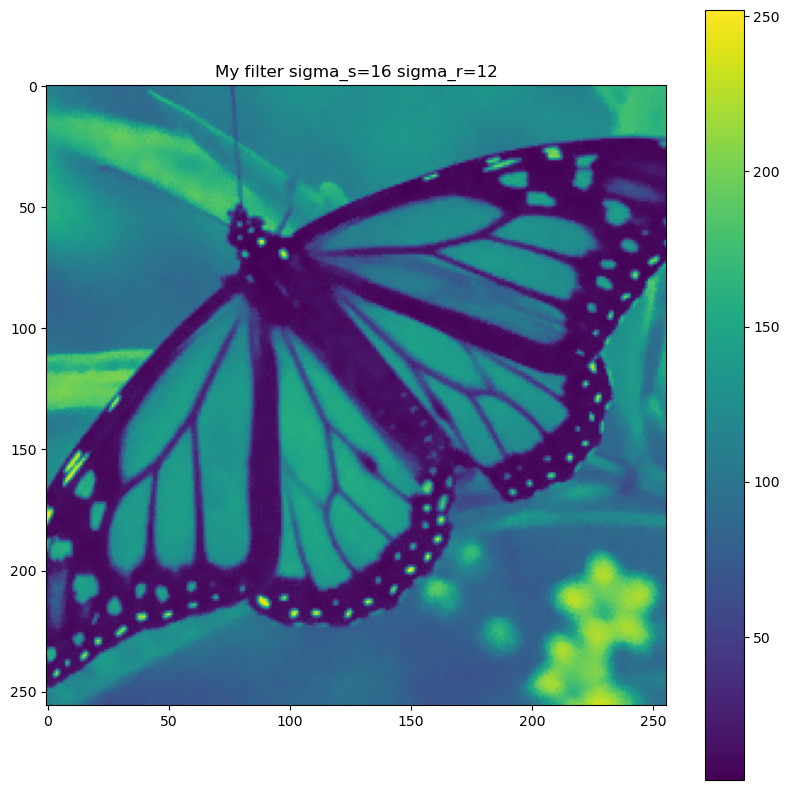

In [19]:
# run bilateral_filter(...)
d = 5  # edge size of neighborhood perimeter

# my test 
sigma_r = 20
sigma_s = 24


filtered_image = bilateral_filter(src, d, sigma_r, sigma_s)


plt.figure(figsize=(10, 10))
plt.imshow(filtered_image)
plt.title("My filter sigma_s=24 sigma_r=20")
#plt.imshow(src, cmap="gray", vmin=0, vmax=255)
plt.colorbar()
plt.show()

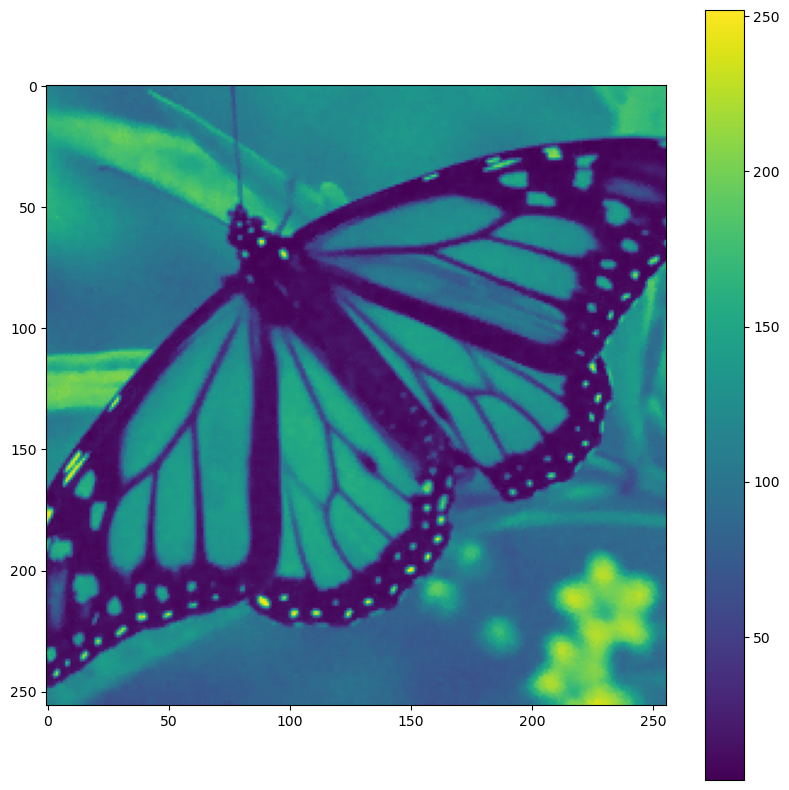

In [16]:
# compare to opencv
filtered_image_OpenCV = cv2.bilateralFilter(src, d, sigma_r, sigma_s)

plt.figure(figsize=(10, 10))
plt.imshow(filtered_image_OpenCV)
plt.colorbar()
plt.show()



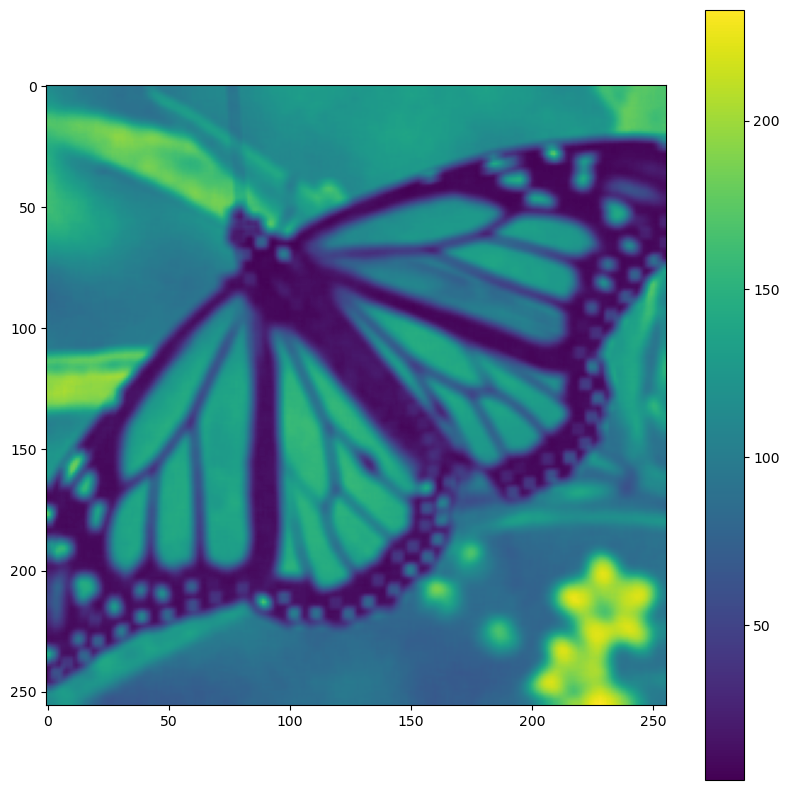

In [17]:
# compare to regular gaussian blur
blur = cv2.GaussianBlur(src, (d, d), sigma_s)
plt.figure(figsize=(10, 10))
plt.imshow(blur)
plt.colorbar()
plt.show()



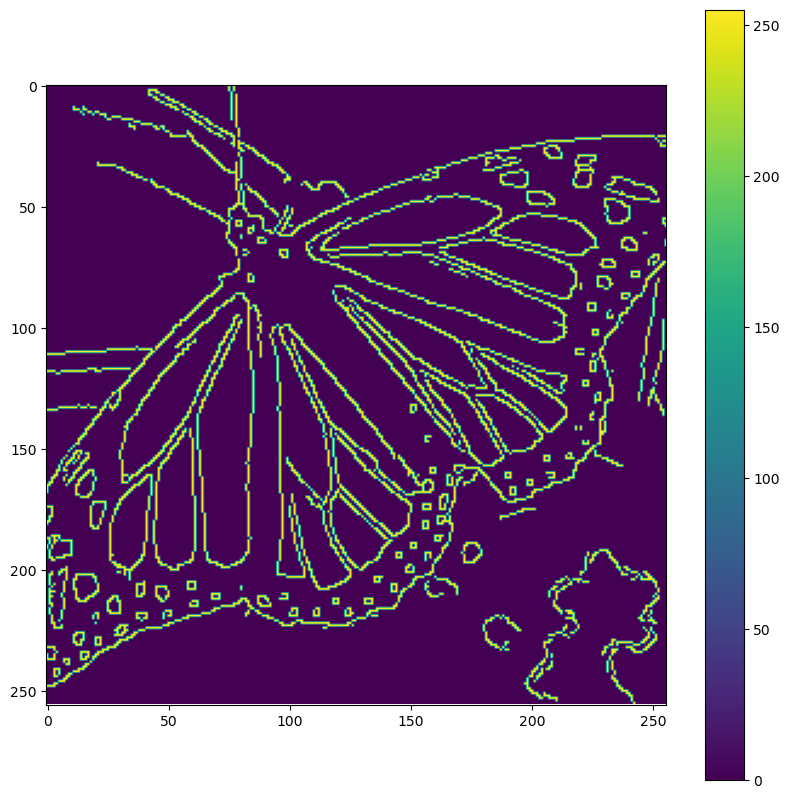

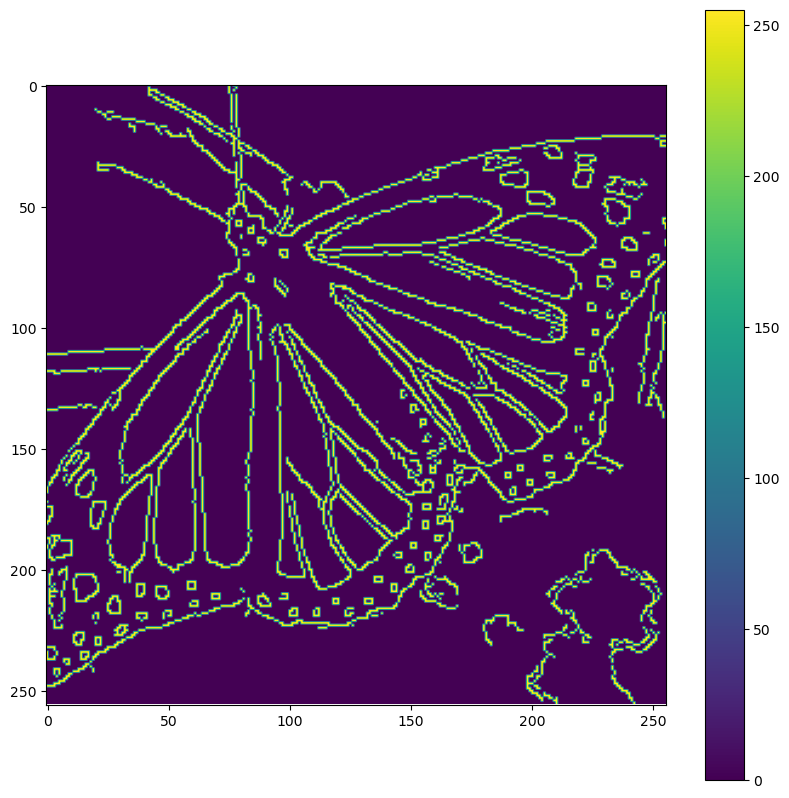

In [22]:
# compare canny results between the two images
th_low = 100
th_high = 200
res = cv2.Canny(filtered_image, th_low, th_high)
plt.figure(figsize=(10, 10))
plt.imshow(res)
plt.colorbar()
plt.show()

res = cv2.Canny(src, th_low, th_high)
plt.figure(figsize=(10, 10))
plt.imshow(res)
plt.colorbar()
plt.show()
